In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

C:\Users\15726\AppData\Local\Temp\ipykernel_20736\1912864649.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df_o = np.append(df.Occupation.unique(),"ALL")
df_o

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect', 'ALL'],
      dtype=object)

In [6]:
df.Annual_Income.quantile(0.75)

71683.47

# 1.seperate analysis

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [5]:
# delete useless statistics
df.drop(['ID','Customer_ID','Name','SSN'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

<AxesSubplot: >

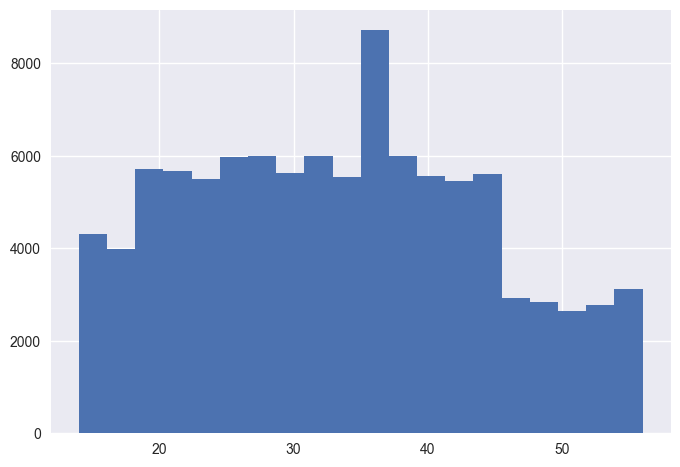

In [9]:
df.Age.hist(bins=20)

<AxesSubplot: >

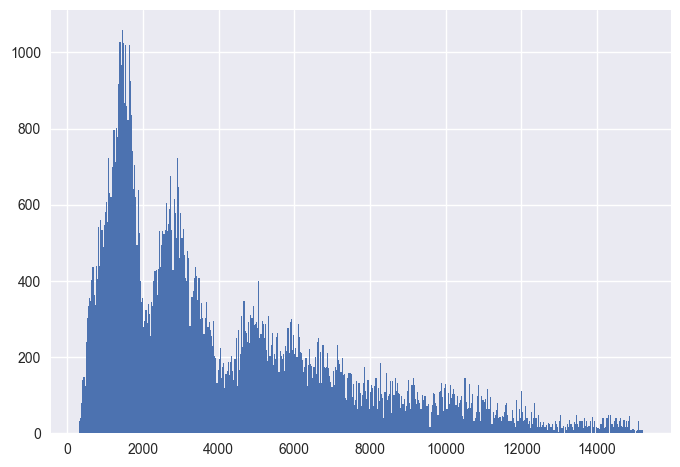

In [10]:

df.Monthly_Inhand_Salary.hist(bins=500)


<AxesSubplot: >

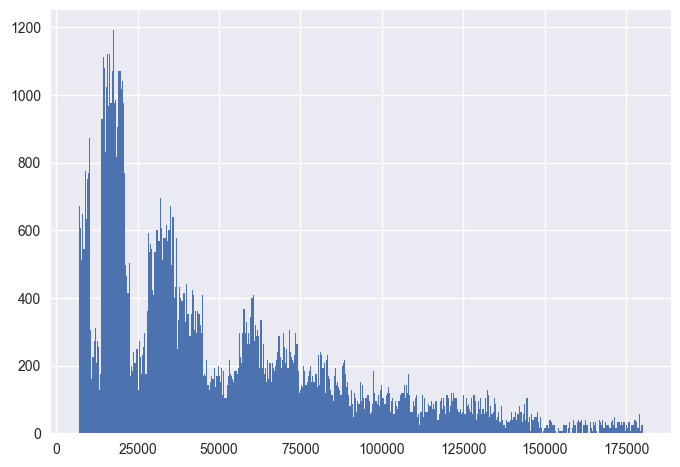

In [4]:
df.Annual_Income.hist(bins=500)


In [72]:
fig3, ax3 = plt.subplots(figsize=(10,5))
ax3 = plt.hist(data=df,x='Annual_Income',bins=500,c=df['Annual_Income'])

plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'c'

In [8]:
df3 = df.groupby('Occupation').Annual_Income.mean()
type(df3)

pandas.core.series.Series

<AxesSubplot: xlabel='Occupation'>

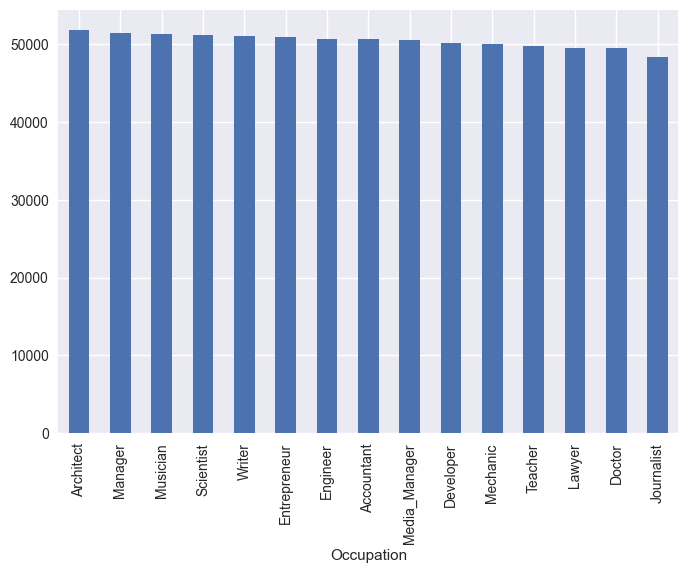

In [31]:
df3.plot.bar()

In [11]:
age = {}
x = 0
ages = df.Age.value_counts()
for i in range(14, 57):
    x += ages[i]
    if i == 20:
        age['14-20'] = x
        x = 0
    elif i == 30:
        age['21-30'] = x
        x = 0
    elif i == 40:
        age['31-40'] = x
        x = 0
    elif i == 50:
        age['41-50'] = x
        x = 0
    elif i == 56:
        age['51-56'] = x
age_groups = pd.DataFrame({'Age_range': age.keys(), 'Total_persons': age.values()})
age_groups

,Age_range,Total_persons
0,14-20,14003
1,21-30,28793
2,31-40,28968
3,41-50,21006
4,51-56,7230


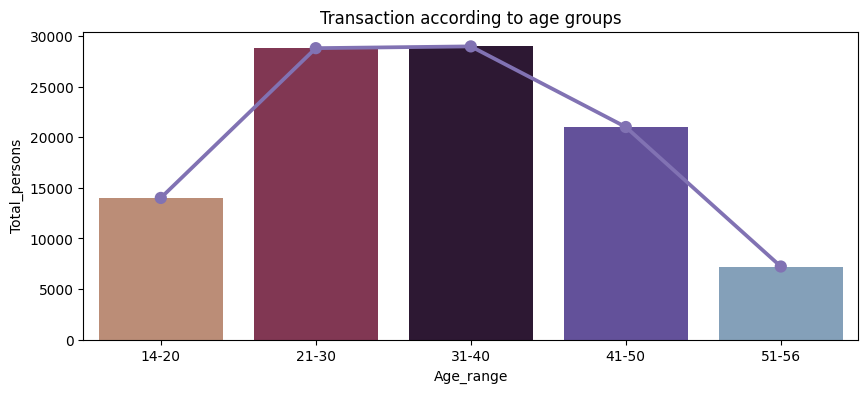

In [189]:
plt.figure(figsize=(10,4), dpi=100)
plt.title('Transaction according to age groups')
sns.barplot(data=age_groups, x='Age_range', y='Total_persons', palette='twilight_r')
sns.pointplot(data=age_groups, x='Age_range', y='Total_persons', color='m')
plt.show()



In [14]:
df.Annual_Income.max()
df.Annual_Income.min()

7005.93

In [16]:
df.Type_of_Loan.value_counts().head(10) #NO DATA???

No Data                    11408
Not Specified               1408
Credit-Builder Loan         1280
Personal Loan               1272
Debt Consolidation Loan     1264
Student Loan                1240
Payday Loan                 1200
Mortgage Loan               1176
Auto Loan                   1152
Home Equity Loan            1136
Name: Type_of_Loan, dtype: int64

<AxesSubplot: xlabel='Age', ylabel='Delay_from_due_date'>

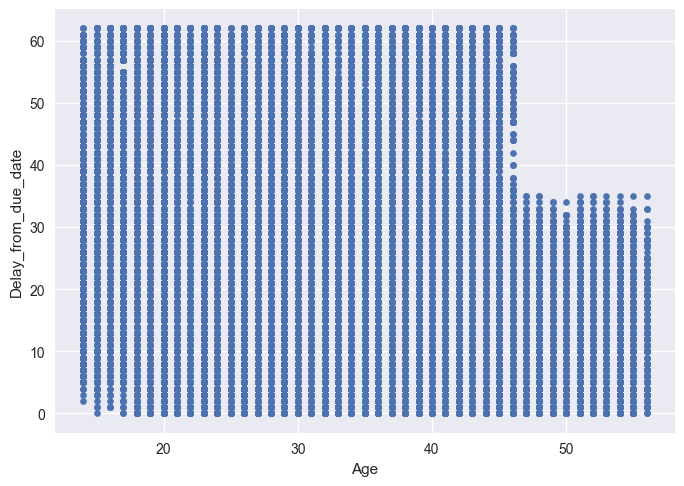

In [17]:
df.plot.scatter(x = 'Age',y = 'Delay_from_due_date')


In [18]:
pd.DataFrame({'Payment_of_Min_Amount':df['Payment_of_Min_Amount'].unique()})


,Payment_of_Min_Amount
0,No
1,NM
2,Yes


In [19]:
a = []
x = 0
for i in df['Payment_of_Min_Amount'].unique():
    x = i.split(',')
    for v in x:
        v = v.replace('and', '').strip(' ')
        if v not in a and v != '':
            a.append(v)
distinct_loan = pd.DataFrame({'new_Payment_of_Min_Amount': a})
distinct_loan

num_of_each_choice = [[],[]]
# refernce data from 2.4
for i in distinct_loan['new_Payment_of_Min_Amount']:
    a = 0
    for x in df['Payment_of_Min_Amount']:
        if i in x: 
            a += x.count(i)
    num_of_each_choice[0].append(i)
    num_of_each_choice[1].append(a)
total_num_of_paystyle = pd.DataFrame({'Weather_pay_min':num_of_each_choice[0], 'Total_number_of_people':num_of_each_choice[1]})
total_num_of_paystyle

,Weather_pay_min,Total_number_of_people
0,No,35667
1,NM,12007
2,Yes,52326


In [20]:

df['Payment_of_Min_Amount'].value_counts(normalize = True)

Yes    0.52326
No     0.35667
NM     0.12007
Name: Payment_of_Min_Amount, dtype: float64

<AxesSubplot: >

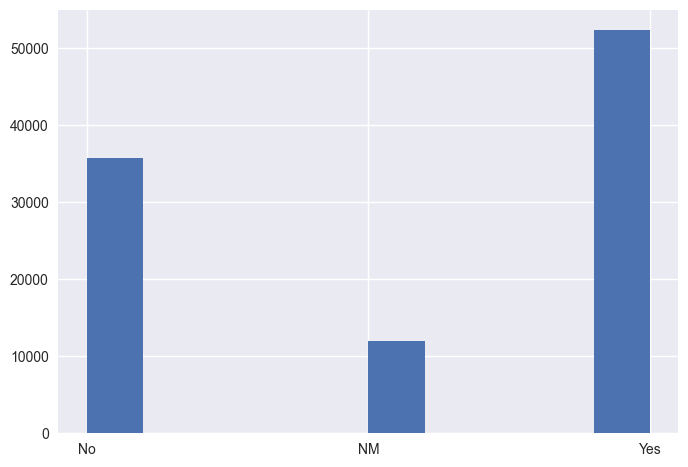

In [21]:
df['Payment_of_Min_Amount'].hist()

In [22]:
df2 = df.groupby('Credit_Score').mean()

print(df2)



                 Month        Age  Annual_Income  Monthly_Inhand_Salary  \
Credit_Score                                                              
Good          4.671864  36.402625   65203.672105            5399.919696   
Poor          4.518760  31.194565   40584.515325            3380.560657   
Standard      4.432147  33.438673   50987.164840            4239.436890   

              Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
Credit_Score                                                                   
Good                   3.440263         4.143258       7.662329     2.202154   
Poor                   6.526726         6.625147      20.187116     4.755742   
Standard               5.383966         5.404427      13.751420     3.312164   

              Delay_from_due_date  Num_of_Delayed_Payment  \
Credit_Score                                                
Good                    10.958997                8.564842   
Poor                    29.728809       

C:\Users\15726\AppData\Local\Temp\ipykernel_19212\3631643831.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby('Credit_Score').mean()


In [23]:
payment_delay_accounts = df['Num_of_Delayed_Payment'].value_counts()
count_of_person = {}
x = 0
for i in range(len(payment_delay_accounts)):
    x += payment_delay_accounts[i]
    if i == 0:
        count_of_person['No_payment_delay'] = x
        x = 0
    elif i == 5:
        count_of_person['1-5'] = x
        x = 0
    elif i == 10:
        count_of_person['6-10'] = x
        x = 0
    elif i == 15:
        count_of_person['11-15'] = x
        x = 0
    elif i == 20:
        count_of_person['16-20'] = x
        x = 0
    elif i == 25:
        count_of_person['21-25'] = x
        x = 0
accounts_have_payment_delays = pd.DataFrame({'payment_delay_ranges':count_of_person.keys(),'num_of_accounts':count_of_person.values()})
accounts_have_payment_delays

,payment_delay_ranges,num_of_accounts
0,No_payment_delay,2081
1,1-5,10432
2,6-10,21527
3,11-15,25324
4,16-20,28834
5,21-25,11802


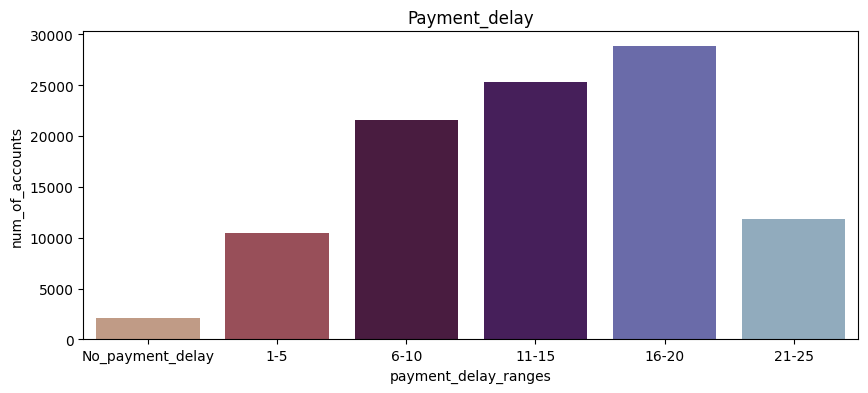

In [179]:
plt.figure(figsize=(10,4), dpi=100)
plt.title('Payment_delay')
sns.barplot(data=accounts_have_payment_delays, x='payment_delay_ranges', y='num_of_accounts', palette='twilight_r')
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Outstanding_Debt'>

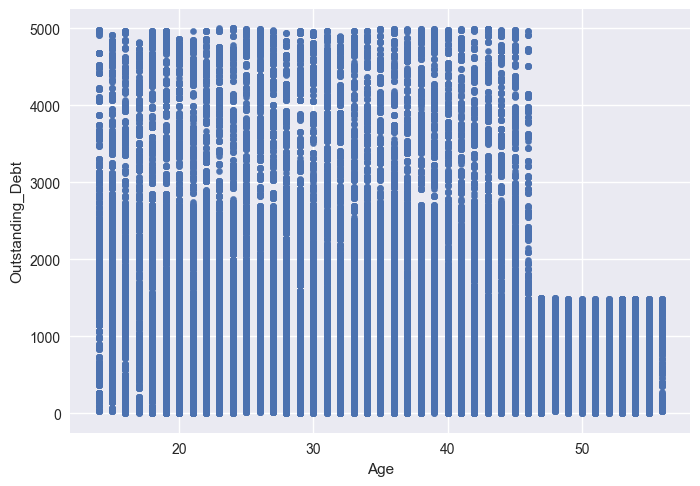

In [25]:
#Outstanding_Debt: Represents the remaining debt to be paid (in USD)
df.plot.scatter(x = 'Age',y = 'Outstanding_Debt') # make explaination about sudden drop

In [26]:
pd.DataFrame({'Age':count_of_person.keys(),'num_of_accounts':count_of_person.values()})
accounts_have_payment_delays

,payment_delay_ranges,num_of_accounts
0,No_payment_delay,2081
1,1-5,10432
2,6-10,21527
3,11-15,25324
4,16-20,28834
5,21-25,11802


<AxesSubplot: xlabel='Age', ylabel='Credit_History_Age'>

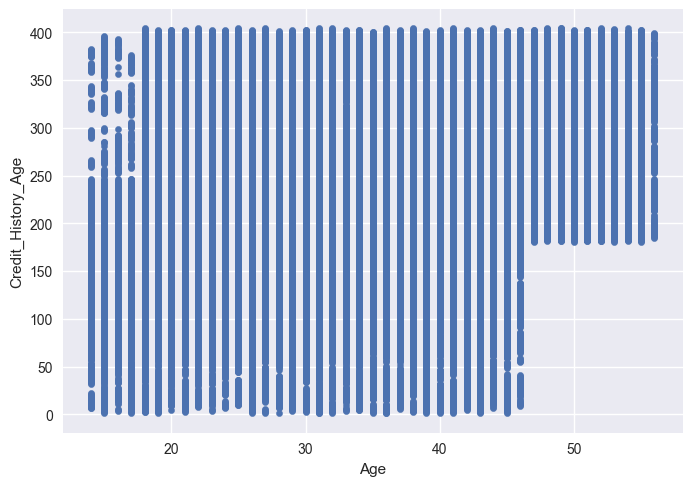

In [27]:
df.plot.scatter(x = 'Age',y = 'Credit_History_Age')

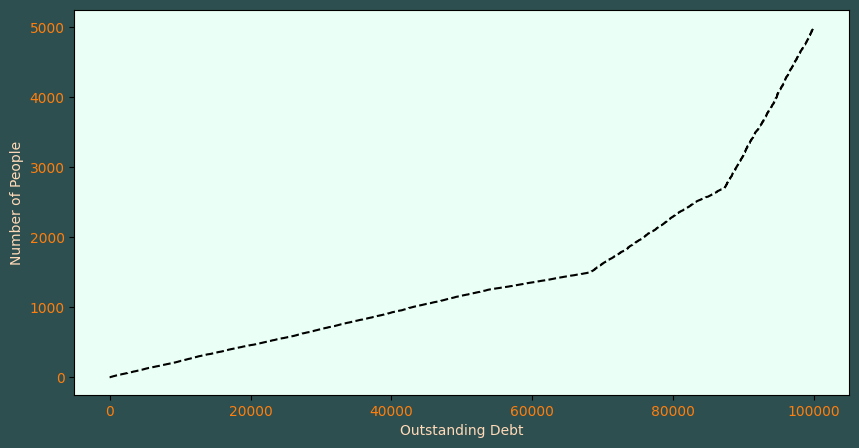

In [143]:
fig, ax = plt.subplots(figsize=(10,5),facecolor=(.18, .31, .31))
df.sort_values(by='Outstanding_Debt',ignore_index=True).Outstanding_Debt.plot(ax=ax,linestyle='dashed',color='black')
ax.set_facecolor('#eafff5')
ax.set_ylabel('Number of People',color='peachpuff',)
ax.set_xlabel('Outstanding Debt',color='peachpuff')
ax.tick_params(labelcolor='tab:orange')

<AxesSubplot: xlabel='Credit_Score,Payment_Behaviour'>

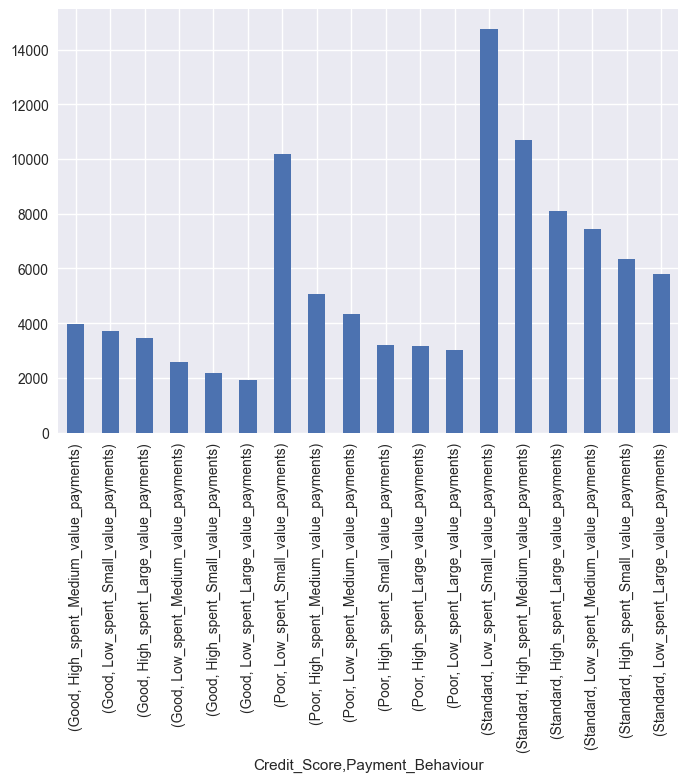

In [36]:
df.groupby('Credit_Score').Payment_Behaviour.value_counts().plot.bar(rot=90)
#try to make the diagram roatate for 90 degrees
#sns.countplot(df.Payment_Behaviour,palette="mako")
#plt.xticks(rotation=45)
.set_xticks(df_c.index, df_c.country, rotation=60)

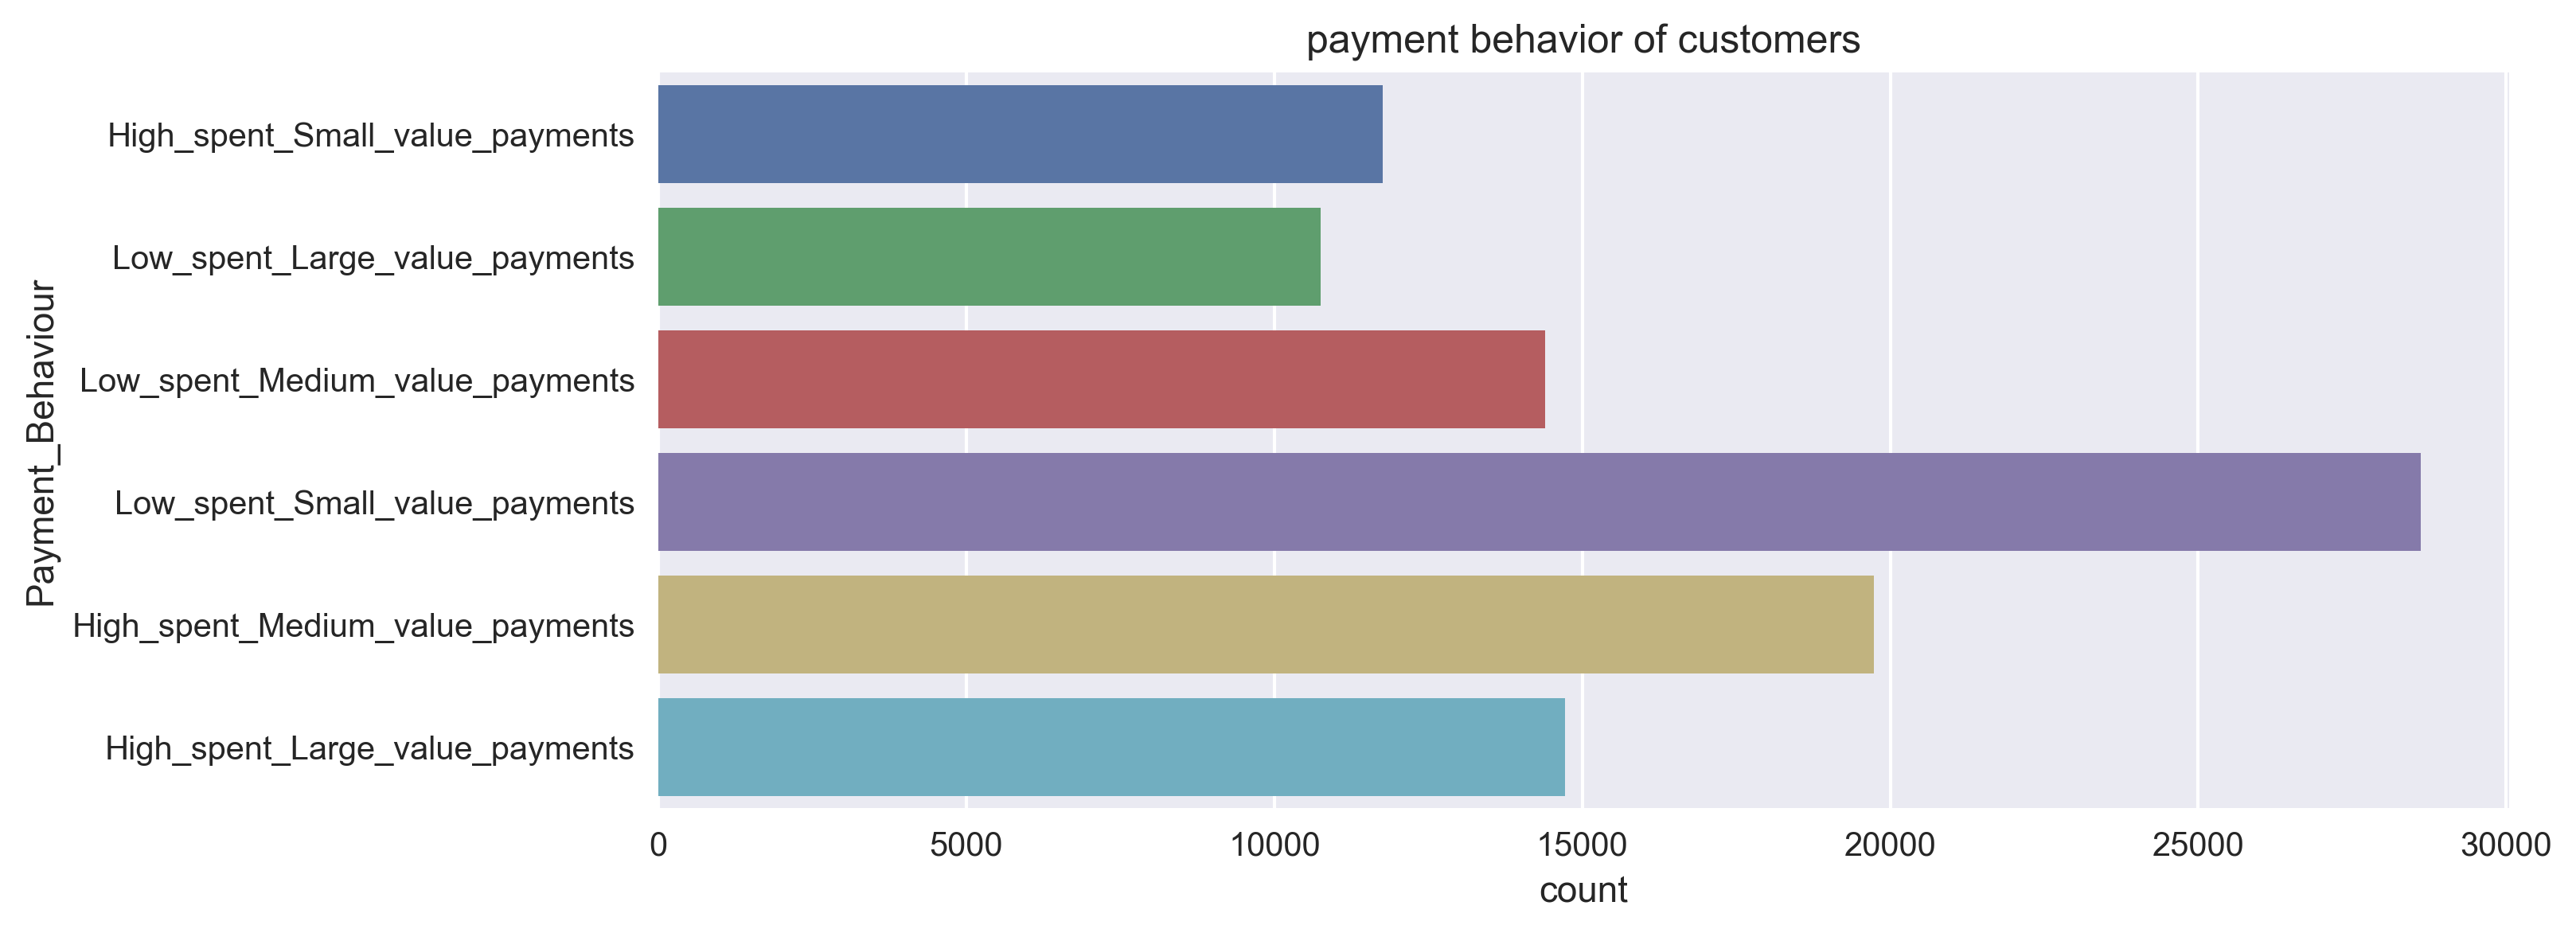

In [41]:
plt.figure(figsize=(10,4), dpi=300)
plt.title('payment behavior of customers')
sns.countplot(data=df,y = 'Payment_Behaviour')
plt.show()

## 2. The Analysis of the Relationships Between Credit and Other Factors

C:\Users\15726\AppData\Local\Temp\ipykernel_19212\916765962.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Credit_Score').sum().plot.bar()


<AxesSubplot: xlabel='Credit_Score'>

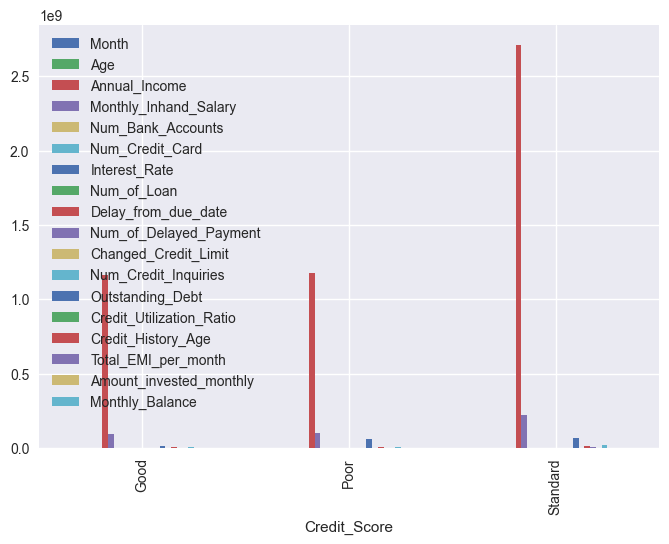

In [30]:
df.groupby('Credit_Score').sum().plot.bar()


In [ ]:
plt.figure(figsize=(12,4), dpi=300)
plt.title('Each type of loan distribution')
plt.xticks(rotation=45)
sns.barplot(data=total_num_of_each_loan, x='Loan_type', y='Total_number', palette='twilight_r')
plt.show()

In [29]:
df2

Credit_Score  Payment_of_Min_Amount
Good          No                       0.877302
              Yes                      0.122698
Poor          Yes                      0.812716
              No                       0.187284
Standard      Yes                      0.632985
              No                       0.367015
Name: Payment_of_Min_Amount, dtype: float64

In [37]:
df2.info()


<class 'pandas.core.series.Series'>
MultiIndex: 6 entries, ('Good', 'No') to ('Standard', 'No')
Series name: Payment_of_Min_Amount
Non-Null Count  Dtype  
--------------  -----  
6 non-null      float64
dtypes: float64(1)
memory usage: 511.0+ bytes


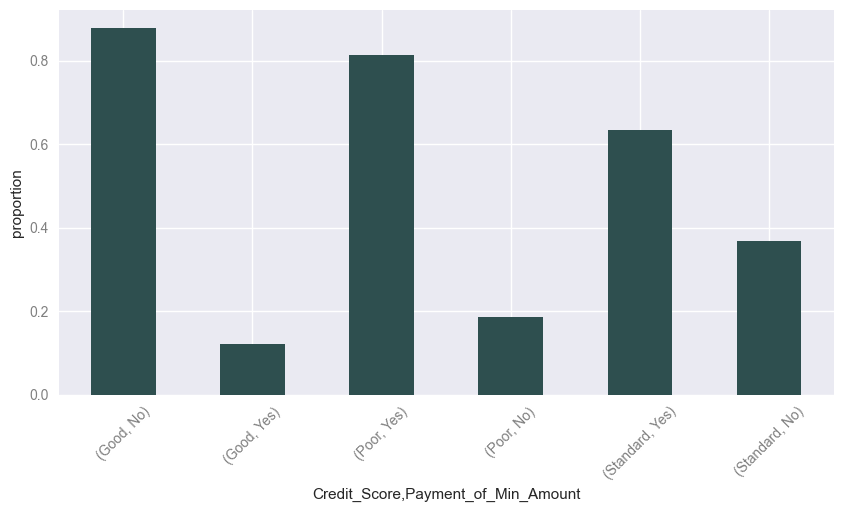

In [38]:
df1 = df.drop(df[df['Payment_of_Min_Amount'].str.contains('NM',na=False)].index)
df2 = df1.groupby('Credit_Score').Payment_of_Min_Amount.value_counts(normalize=True)
fig, ax = plt.subplots(figsize=(10,5))
df2.plot.bar(ax=ax,color=(.18, .31, .31))
plt.xticks(rotation=45)
plt.ylabel('proportion')
ax.tick_params(labelcolor='Grey')
fig


In [113]:
df2 = df1.groupby('Credit_Score').Payment_of_Min_Amount.value_counts(normalize=True)
df2

Credit_Score  Payment_of_Min_Amount
Good          No                       0.877302
              Yes                      0.122698
Poor          Yes                      0.812716
              No                       0.187284
Standard      Yes                      0.632985
              No                       0.367015
Name: Payment_of_Min_Amount, dtype: float64

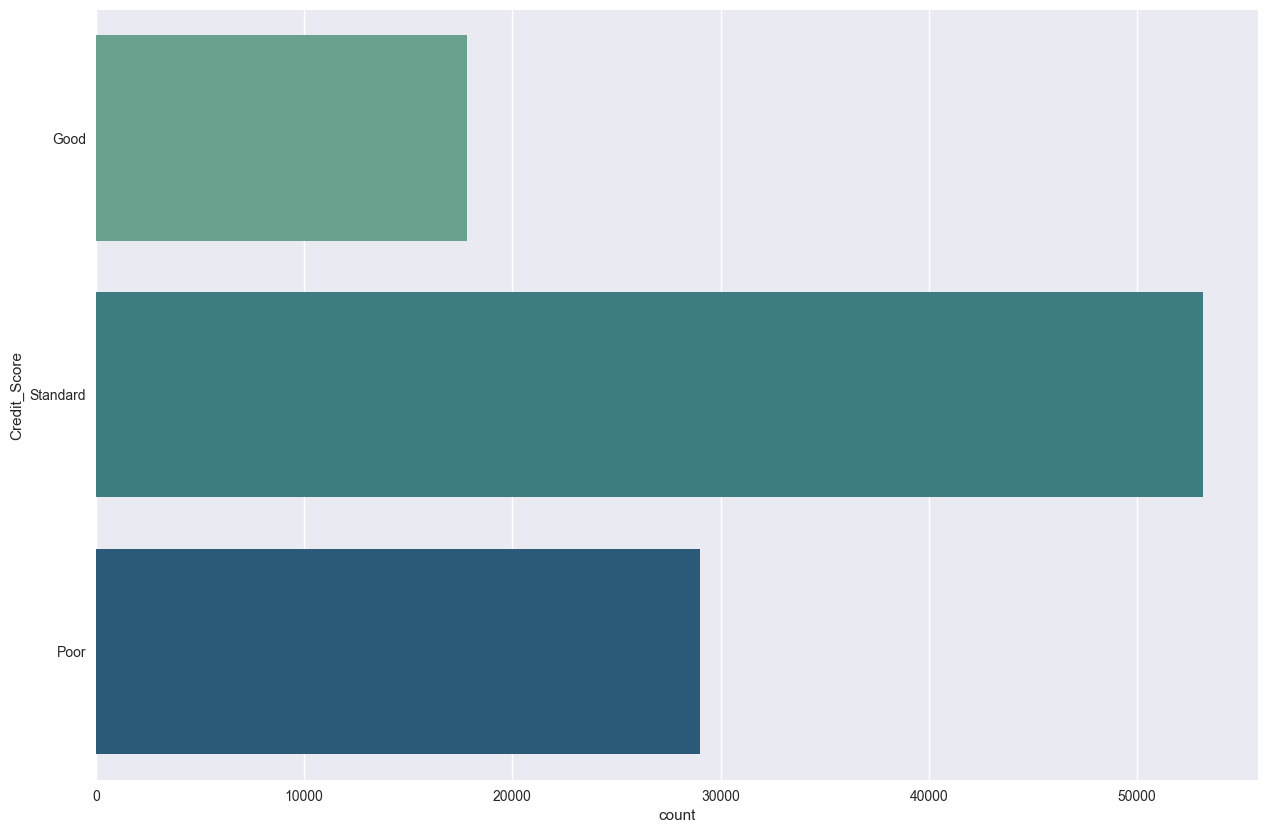

In [43]:
import streamlit as st
fig, ax = plt.subplots(figsize=(15,10))
#df.Credit_Score.hist(xlabelsize=25,ylabelsize=25)
#cmGreen = sns.light_palette("green", as_cmap=True)
sns.countplot(ax=ax,y='Credit_Score', data=df,palette='crest') # 横过来把y设成数据
st.pyplot(fig)
fig